<font color=#09D8B9><h1><b>EDA</b></h1></font>

<h5>We are looking to  understand the structure and characteristics of data using tools like(python-notebooks, SQL_DB, PowerBi)<h5>

<p>Our data was extremely dirty, so they underwent a pre-cleaning process before being loaded into a dataframe and then into a SQL database.</p>

<p>Our data consists of real company data, They came in Excel format with unconventional structures.</p>

**for now, we have four main tables**

- ins_programadas (inspecciones programadas)
- ins_no_programados (inspecciones no programadas)
- act_programadas (actividades programadas)
- act_no_programadas (actividades no programadas)

---

<font color=#09D825 ><h4>Preprocess stage</h4></font>

<ol>
<li>load own libraries</li>
<li>load alien python libraries</li>
<li>defined modules</li>
</ol>

In [15]:
import sys
sys.path.append(r"../Aplication")
import Pysqlconnect

In [8]:
from decouple import config
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re

**We create the table before using the preload file**
- first we need to know our data


In [13]:
def load_query(): #create a function for iter the diferents tables
    lst = []
    for i in range(1,5):
        get_all_data = f"SELECT * FROM {config(f"DB_TABLE{i}")}"
        lst.append(get_all_data)
    return lst

datasets = load_query() 
print(datasets) #show the querys

['SELECT * FROM act_programadas', 'SELECT * FROM act_no_programadas', 'SELECT * FROM ins_no_programadas', 'SELECT * FROM ins_programadas']


In [17]:
#define our datasets

df_ins_no = pd.read_sql(datasets[2],Pysqlconnect.connection())
df_ins = pd.read_sql(datasets[3],Pysqlconnect.connection())
df_act_no = pd.read_sql(datasets[1],Pysqlconnect.connection())
df_act = pd.read_sql(datasets[0],Pysqlconnect.connection())

In [22]:
print(f"""
ins_programadas shape     {df_ins.shape[0]}
ins_no_programadas sahpe  {df_ins_no.shape[0]}

act_programadas  shape    {df_act.shape[0]}
act_no_programadas shape  {df_act_no.shape[0]}
""")
# print the number of entries for each dataset 


ins_programadas shape     137912
ins_no_programadas sahpe  250654

act_programadas  shape    48428
act_no_programadas shape  89369



We can see that we have around 400k rows betwen all tables

In [27]:
print(f"""
    ins_programadas shape     {df_ins.shape[0]}
    ins_no_programadas shape  {df_ins_no.shape[0]}

    act_programadas  shape    {df_act.shape[0]}
    act_no_programadas shape  {df_act_no.shape[0]}
    """)


    ins_programadas shape     137912
    ins_no_programadas shape  250654

    act_programadas  shape    48428
    act_no_programadas shape  89369
    


In [23]:
print(f"""
ins_programadas nulos     {df_ins.isnull().sum().sum()}
ins_no_programadas nulos  {df_ins_no.isnull().sum().sum()}

act_programadas nulos     {df_act.isnull().sum().sum()}
act_no_programadas nulos  {df_act_no.isnull().sum().sum()}
""")
#looking for null values


ins_programadas nulos     57891
ins_no_programadas nulos  27281

act_programadas nulos     41891
act_no_programadas nulos  47327



In [24]:
print("Nulls per column in df_ins_programadas:")
print(df_ins.isnull().sum())

print("\nNulls per column in df_ins_no_programadas:")
print(df_ins_no.isnull().sum())

print("\nNulls per column in df_act_programadas:")
print(df_act.isnull().sum())

print("\nNulls per column in df_act_no_programadas:")
print(df_act_no.isnull().sum())

#now we observe what columns have nulls and how much per each column


Nulls per column in df_ins_programadas:
Código centro          1300
Centro                 1300
Ubicac. técnica        1300
Denominación Ubic.     1300
Equipo                 1300
Denominación           1300
No. Plan               1300
Desc. Plan             1300
Orden                  1300
Actividad              1300
Descripción            1769
Clase de orden         1300
Status sistema         1300
Inicio program.        1354
Responsable           39168
dtype: int64

Nulls per column in df_ins_no_programadas:
Código centro         2415
Centro                2415
Ubicac. técnica       2415
Denominación Ubic.    2415
Equipo                2415
Denominación          2415
No. Plan              1300
Desc. Plan            1300
Orden                 1300
Actividad             1300
Descripción           1933
Clase de orden        1300
Status sistema        1300
Inicio program.       1758
Duración              1300
dtype: int64

Nulls per column in df_act_programadas:
Código centro           

- We can see that there are null values ​​present in several columns across all the datasets, which indicate that there are still many empty rows.
- The pattern of null data across the different columns indicates a consistency of errors, for example certain columns consistently have null values ​​which indicates problems with the collection.

In [29]:
df_act_no.keys()

Index(['Código centro', 'Centro', 'Ubicac. técnica', 'Denominación Ubic.',
       'Equipo', 'Denominación', 'No. Plan', 'Desc. Plan', 'Orden',
       'Actividad', 'Clase de orden', 'Status sistema', 'Inicio program.',
       'Duración', 'Prioridad'],
      dtype='object')

In [33]:
df_ins.keys()

Index(['Código centro', 'Centro', 'Ubicac. técnica', 'Denominación Ubic.',
       'Equipo', 'Denominación', 'No. Plan', 'Desc. Plan', 'Orden',
       'Actividad', 'Descripción', 'Clase de orden', 'Status sistema',
       'Inicio program.', 'Responsable'],
      dtype='object')

In [34]:
print("\nPrioridad column in df_act_programadas:")
print(df_act["Prioridad"].head(5))

print("\nPrioridad column in df_act_no_programadas:")
print(df_act_no["Prioridad"].head(5))


Prioridad column in df_act_programadas:
0          Medio
1          Medio
2           Bajo
3    Muy elevado
4           Alto
Name: Prioridad, dtype: object

Prioridad column in df_act_no_programadas:
0    None
1    None
2    None
3    None
4    None
Name: Prioridad, dtype: object


In [35]:
# Define the minimum proportion of non-null values required (in this case, 50%)
threshold = len(df_ins.columns) // 2

# Remove rows with more than 50% null values 
df_ins = df_ins.dropna(thresh=threshold)

df_ins_no = df_ins_no.dropna(thresh=threshold)

df_act = df_act.dropna(thresh=threshold)

df_act_no = df_act_no.dropna(thresh=threshold)


In [36]:
print("Nulls per column in df_ins_programadas:")
print(df_ins.isnull().sum())

print("\nNulls per column in df_ins_no_programadas:")
print(df_ins_no.isnull().sum())

print("\nNulls per column in df_act_programadas:")
print(df_act.isnull().sum())

print("\nNulls per column in df_act_no_programadas:")
print(df_act_no.isnull().sum())

Nulls per column in df_ins_programadas:
Código centro             0
Centro                    0
Ubicac. técnica           0
Denominación Ubic.        0
Equipo                    0
Denominación              0
No. Plan                  0
Desc. Plan                0
Orden                     0
Actividad                 0
Descripción             469
Clase de orden            0
Status sistema            0
Inicio program.          54
Responsable           37868
dtype: int64

Nulls per column in df_ins_no_programadas:
Código centro         1115
Centro                1115
Ubicac. técnica       1115
Denominación Ubic.    1115
Equipo                1115
Denominación          1115
No. Plan                 0
Desc. Plan               0
Orden                    0
Actividad                0
Descripción            633
Clase de orden           0
Status sistema           0
Inicio program.        458
Duración                 0
dtype: int64

Nulls per column in df_act_programadas:
Código centro           

In [37]:
print(f"""
    ins_programadas shape     {df_ins.shape[0]}
    ins_no_programadas shape  {df_ins_no.shape[0]}

    act_programadas  shape    {df_act.shape[0]}
    act_no_programadas shape  {df_act_no.shape[0]}
    """)


    ins_programadas shape     136612
    ins_no_programadas shape  249354

    act_programadas  shape    47670
    act_no_programadas shape  88607
    


the size doesn't change much after clean the rows with 50% of null values

In [ ]:
#Now we look for which center has the most unscheduled activities.

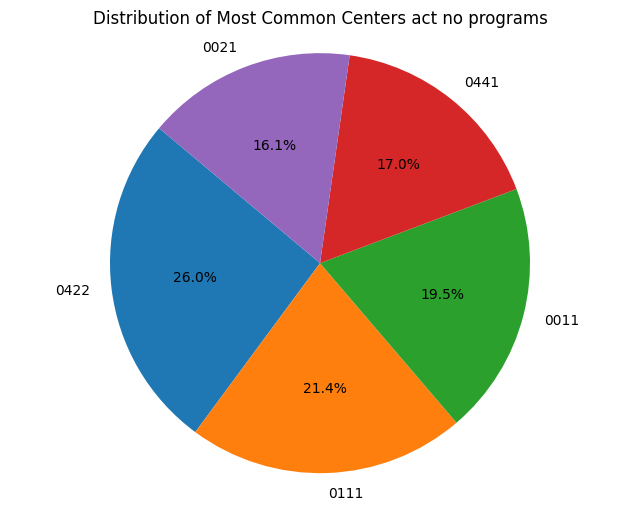

In [43]:
import matplotlib.pyplot as plt

# calculate the frequency of each center
centro_counts = df_act_no['Código centro'].value_counts()

# obtain 5 most commun centers
top_centros = centro_counts.head(5)


plt.figure(figsize=(8, 6))
plt.pie(top_centros, labels=top_centros.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Most Common Centers act no programs')
plt.axis('equal') 
plt.show()

Thats is an interesting <font color=yellow>insight</font> here we can see what are the <font color=red>most comuns centers where they have unexpected troubles</font>

C:\Users\joanm\AppData\Local\Temp\ipykernel_50676\3842739256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_centros['Duración'] = pd.to_numeric(df_top_centros['Duración'], errors='coerce')


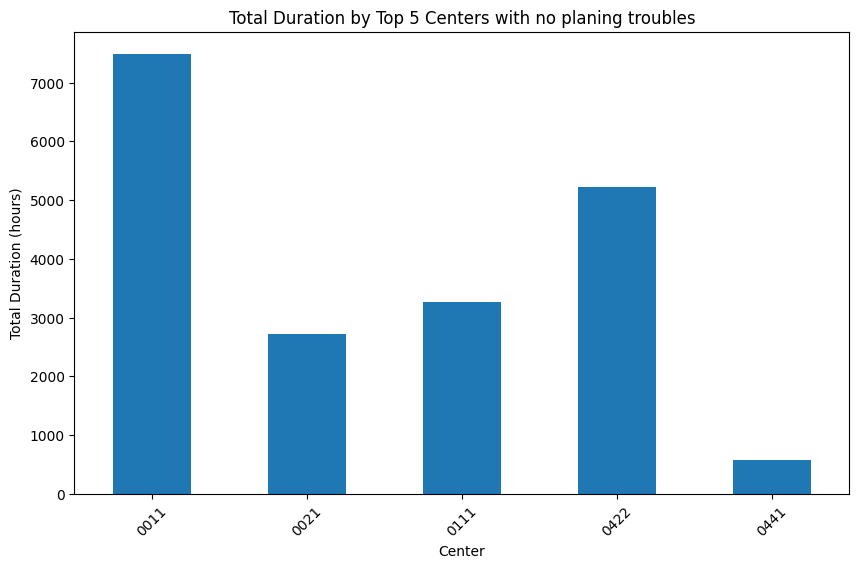

In [49]:
# Obtener los cinco centros más comunes
top_centros = df_act_no['Código centro'].value_counts().head(5).index.tolist()

# filter by top5 centers
df_top_centros = df_act_no[df_act_no['Código centro'].isin(top_centros)]

# transform the column to numeric
df_top_centros['Duración'] = pd.to_numeric(df_top_centros['Duración'], errors='coerce')

#group by 5 most commun centers
duration_by_centro = df_top_centros.groupby('Código centro')['Duración'].sum()


plt.figure(figsize=(10, 6))
duration_by_centro.plot(kind='bar')
plt.title('Total Duration by Top 5 Centers with no planing troubles')
plt.xlabel('Center')
plt.ylabel('Total Duration (hours)')
plt.xticks(rotation=45)
plt.show()